# Estadistica aplicada
 ## Lizbeth Ramos Saucedo   Matricula 1885423
 ### Sesion 09 a 03 de Marzo del 2023

In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [68]:

from lifelines import KaplanMeierFitter

In [69]:
dic_t = {'tiempo': [12, 19, 20, 20, 33],'evento':[1,1,1,0,0]}

In [70]:
dic_nt ={'tiempo':[3,5,7,9,18],'evento':[1,1,1,0,1]}

In [71]:
tratamiento=pd.DataFrame(dic_t)
no_trat=pd.DataFrame(dic_nt)

In [72]:
tratamiento

,tiempo,evento
0,12,1
1,19,1
2,20,1
3,20,0
4,33,0


In [73]:
no_trat

,tiempo,evento
0,3,1
1,5,1
2,7,1
3,9,0
4,18,1


In [74]:
km_t = KaplanMeierFitter().fit(tratamiento['tiempo'], tratamiento['evento'])
km_nt = KaplanMeierFitter().fit(no_trat['tiempo'], no_trat['evento'])

In [75]:
km_t.survival_function_

,KM_estimate
timeline,
0.0,1.0
12.0,0.8
19.0,0.6
20.0,0.4
33.0,0.4


In [76]:
km_nt.survival_function_

,KM_estimate
timeline,
0.0,1.0
3.0,0.8
5.0,0.6
7.0,0.4
9.0,0.4
18.0,0.0


In [77]:
km_t.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5,5
12.0,1,1,0,0,5
19.0,1,1,0,0,4
20.0,2,1,1,0,3
33.0,1,0,1,0,1


In [78]:
km_nt.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5,5
3.0,1,1,0,0,5
5.0,1,1,0,0,4
7.0,1,1,0,0,3
9.0,1,0,1,0,2
18.0,1,1,0,0,1


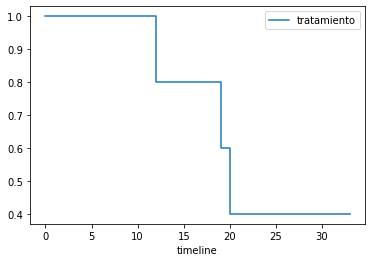

In [79]:
km_t.plot_survival_function(label='tratamiento',ci_show=False);

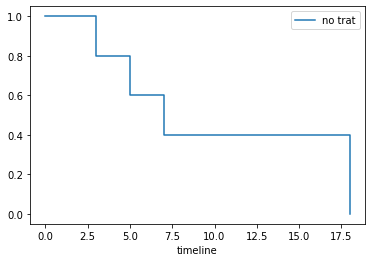

In [80]:
km_nt.plot_survival_function(label = 'no trat',ci_show=False);

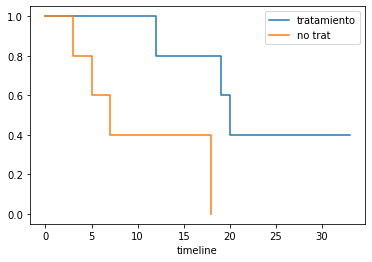

In [81]:
km_t.plot_survival_function(label='tratamiento',ci_show=False);
km_nt.plot_survival_function(label = 'no trat',ci_show=False);

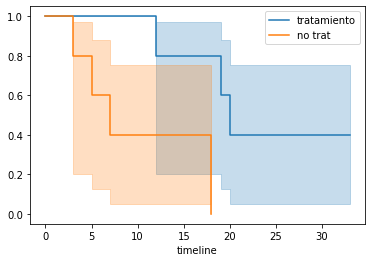

In [82]:
km_t.plot_survival_function(label='tratamiento');
km_nt.plot_survival_function(label = 'no trat');

In [83]:
#Log rank test, haremos prueba de hipotesis
#Es una ji-cuadrada con un grado de libertad
#La Ho: S1(t) = S2(t) funciones de supervivencia son iguales
#La Ha: S1(t) =/ S2(t) funciones de supervivencia distintas
from lifelines.statistics import logrank_test

In [86]:
lrt_1 = logrank_test(tratamiento['tiempo'], tratamiento['evento'], no_trat['tiempo'], no_trat['evento'])

si p value < $\alpha$ rechazamos H0

In [87]:
lrt_1.print_summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.50 0.01      7.34

In [84]:
km_nt.median_survival_time_

7.0

In [85]:
km_t.median_survival_time_

20.0

El 50% de los tratados mueren despues del mes 20